In [37]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
data = pd.read_csv('../dataFiles/housePrices.csv')
print(data)

   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900


In [39]:
# Convert data to NumPy arrays
X = np.array(data[['size', 'bedroom']])
y = np.array(data['price']).reshape(-1, 1)

print(X)

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]


In [42]:
# Polynomial regression using gradient descent
degree = 2  # Degree of the polynomial
learning_rate = 0.01
n_iterations = 2000

In [43]:
# Create a pipeline with polynomial features and standard scaling
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), SGDRegressor(max_iter=n_iterations, eta0=learning_rate))

# Fit the model to the data
model.fit(X, y.ravel())

# Transform X_new using PolynomialFeatures with include_bias=False
X_new_poly = PolynomialFeatures(degree, include_bias=False).fit_transform(X_new)

# Predict using the model
y_new = model.predict(X_new_poly)



C:\Users\DELL2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


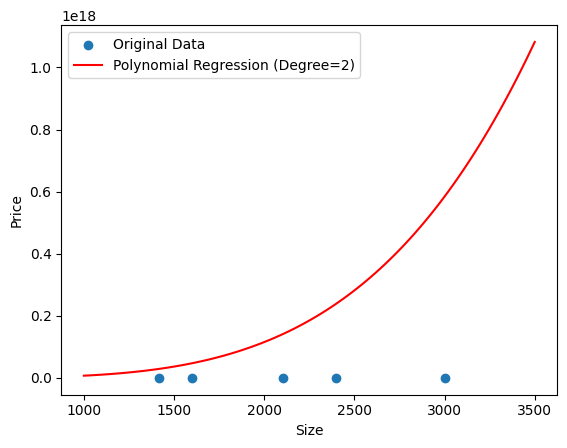

In [44]:
plt.scatter(X[:, 0], y, label='Original Data')
plt.plot(X_new, y_new, 'r-', label=f'Polynomial Regression (Degree={degree})')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()